In [1]:
from imldiff.comparers import DifferenceComparer, AbsoluteDifferenceComparer, SumComparer, SimilarityComparer, \
    DissimilarityComparer, ZeroClippedDifferenceComparer
from imldiff.models import Classifier
from imldiff.plots import plot_decision_boundaries_and_distributions, plot_shap_value_distribution, \
    plot_shap_partial_dependence, plot_shap_values_stacked, plot_shap_values_hierarchically_clustered
from imldiff.explainers import SHAPExplainer, make_shap_explainer
from imldiff.toy_examples.loader import load_data
from imldiff.util import printmd
import shap
import numpy as np
%matplotlib inline
shap.initjs()
notebook_name = 'Move Decision Boundary'
printmd(f'# {notebook_name}')

# Move Decision Boundary

## Create Models

In [2]:
feature_names = ['x1', 'x2']
offset = 0.3

class LeftShiftedClassifier(Classifier):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([0.99 if x[0] - offset/2 > 0.0 else 0.01 for x in X])

class RightShiftedClassifier(Classifier):
    def predict_proba(self, X):
        X = np.asarray(X)
        return np.array([0.99 if x[0] + offset/2 > 0.0 else 0.01 for x in X])

classifiers = [LeftShiftedClassifier(), RightShiftedClassifier()]

In [3]:
X = load_data()

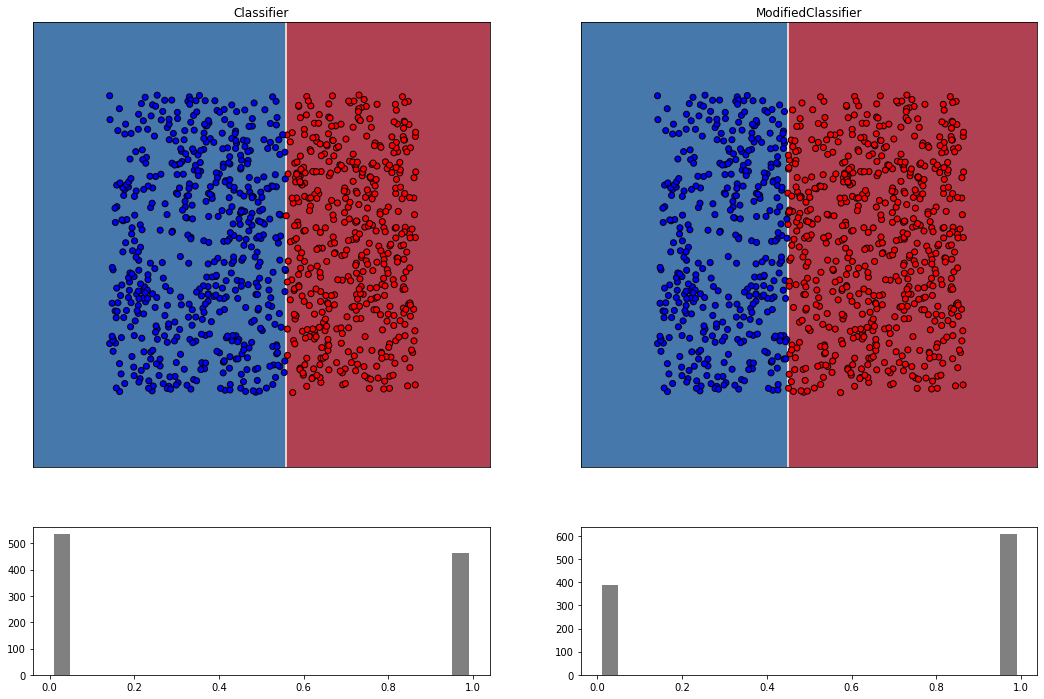

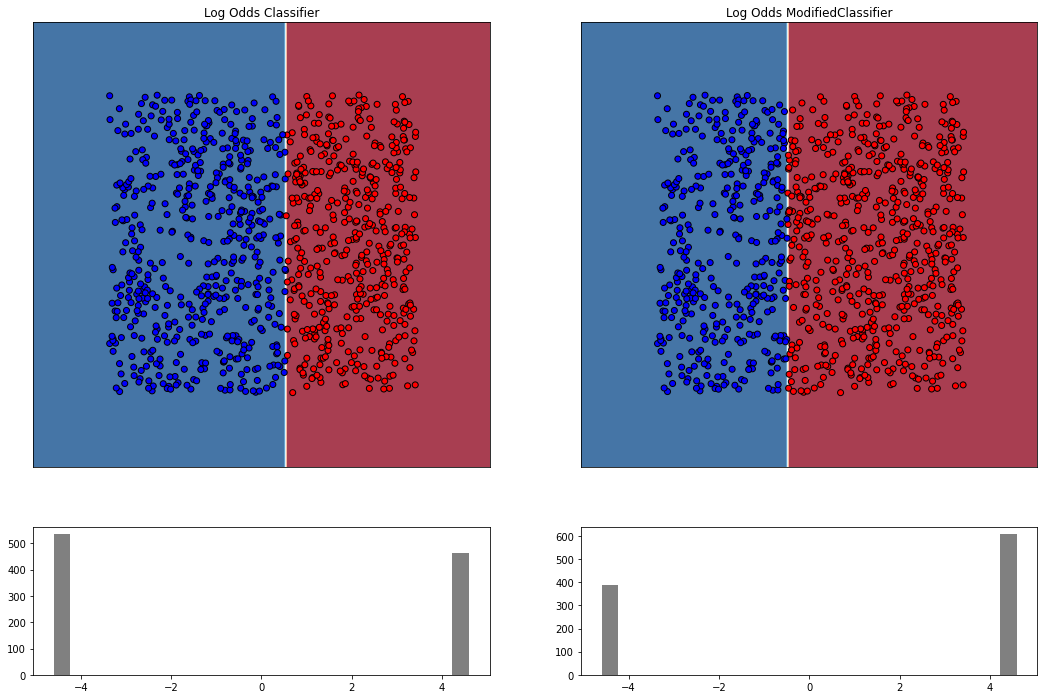

In [4]:
for classifier in classifiers:
    plot_decision_boundaries_and_distributions(classifier, X)

In [5]:
comparers = [
    DifferenceComparer(*classifiers),
    AbsoluteDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*classifiers),
    ZeroClippedDifferenceComparer(*reversed(classifiers)),
    SumComparer(*classifiers),
    SimilarityComparer(*classifiers),
    DissimilarityComparer(*classifiers),
    DissimilarityComparer(*reversed(classifiers))
]

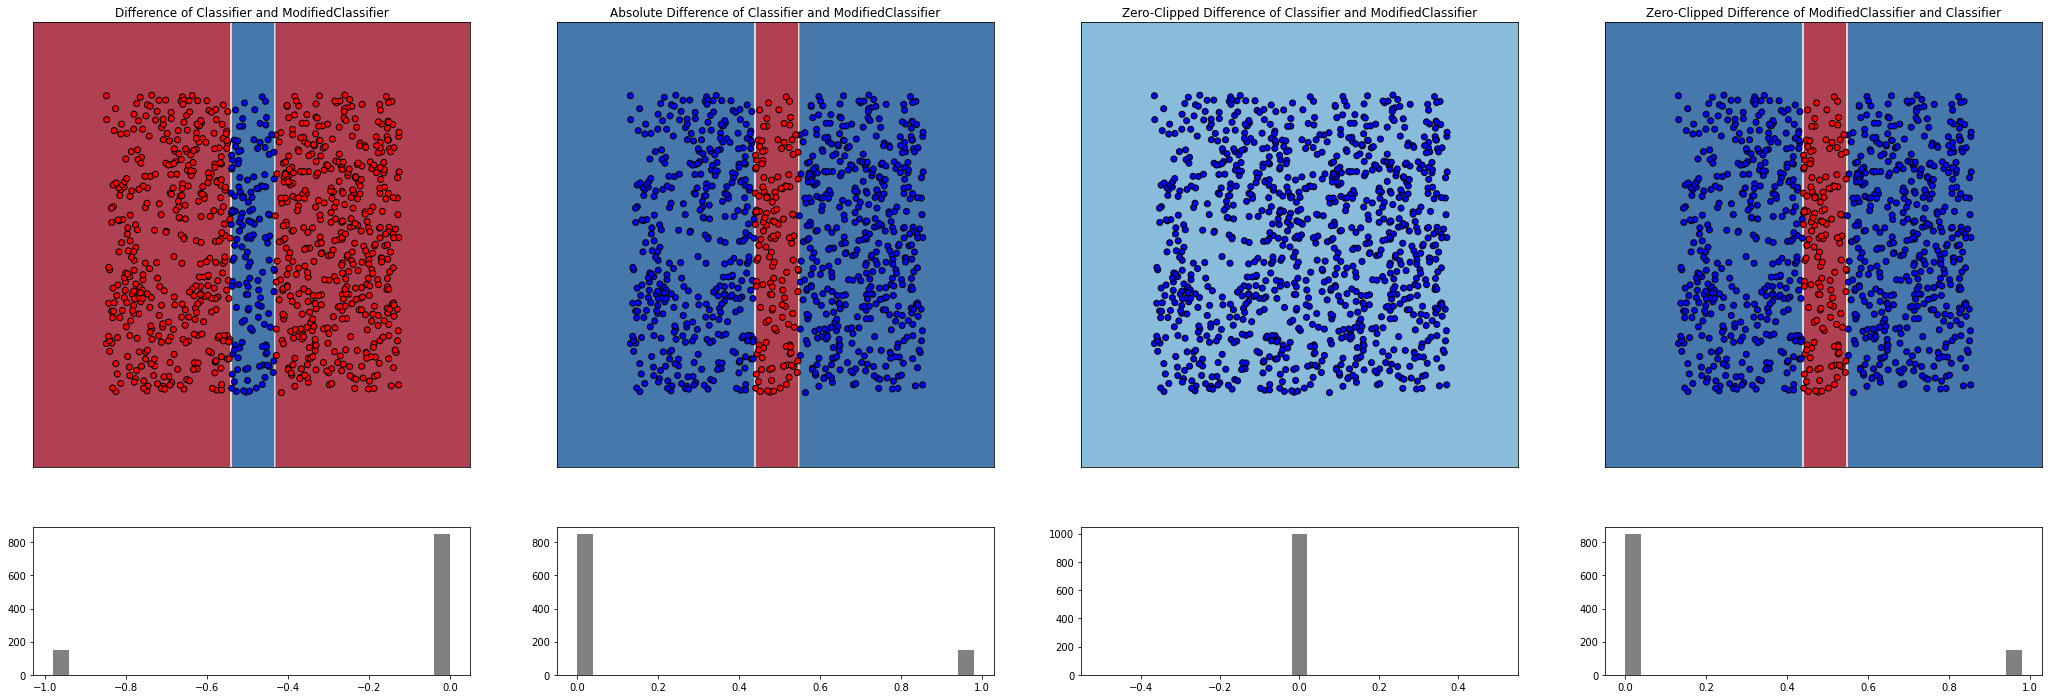

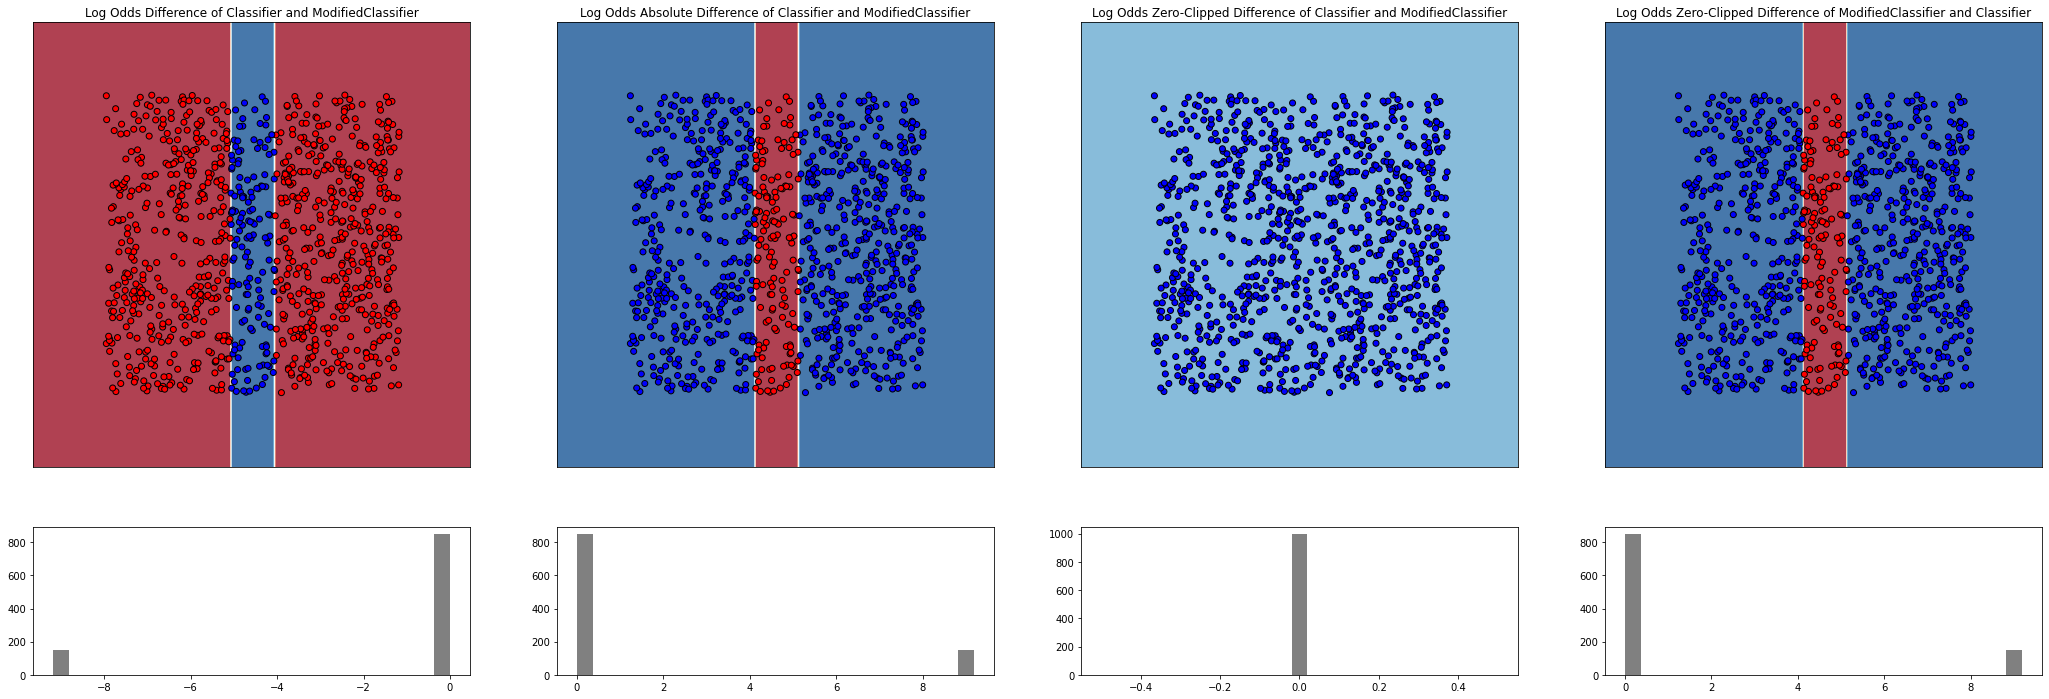

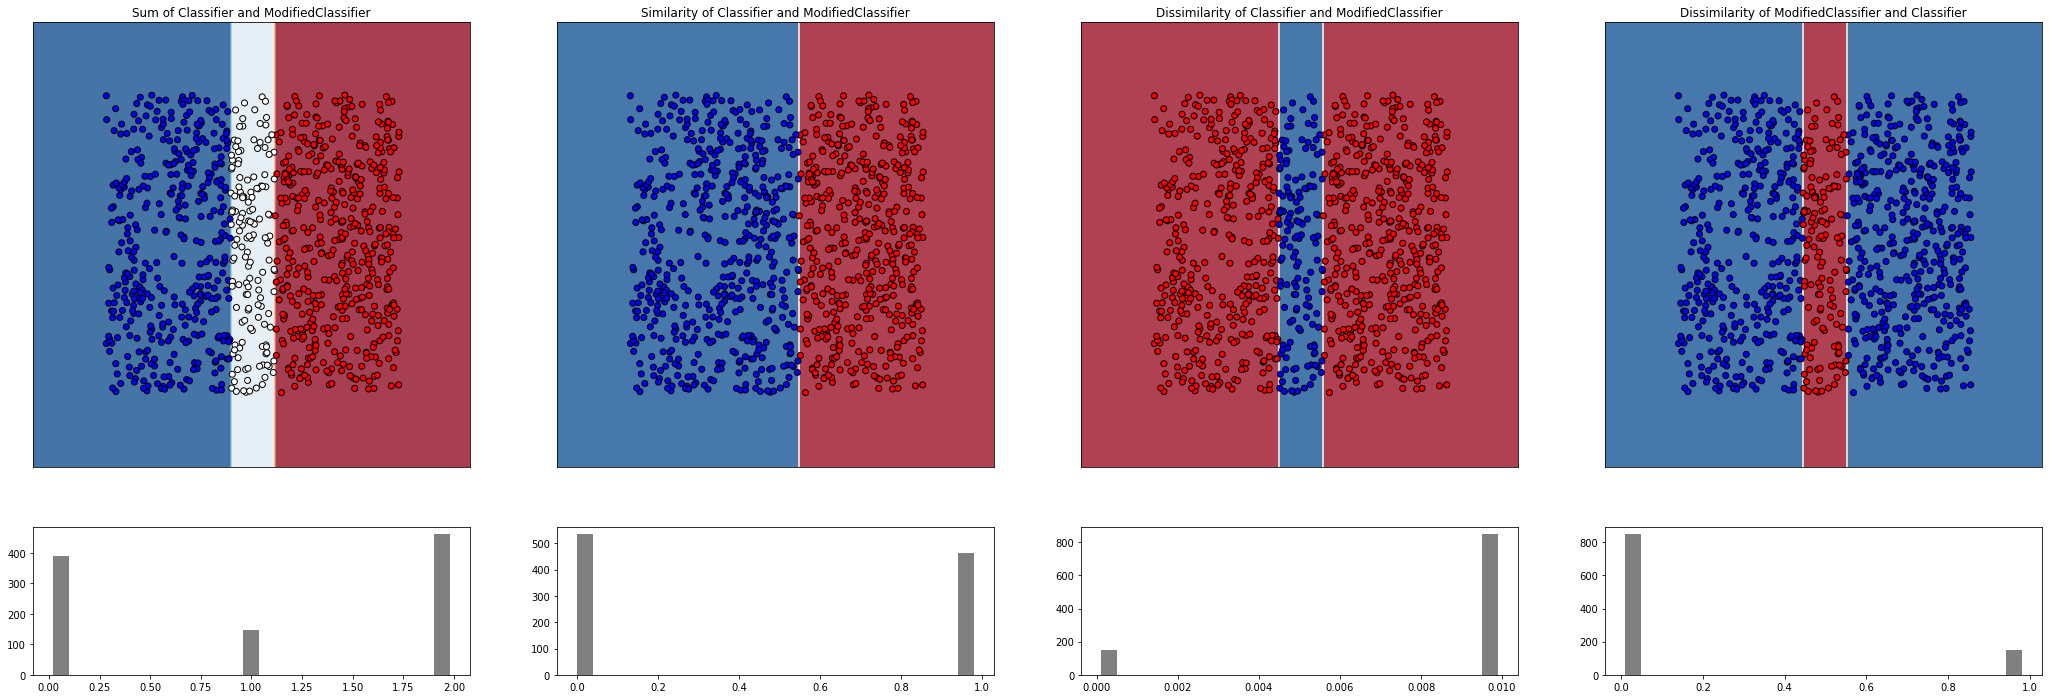

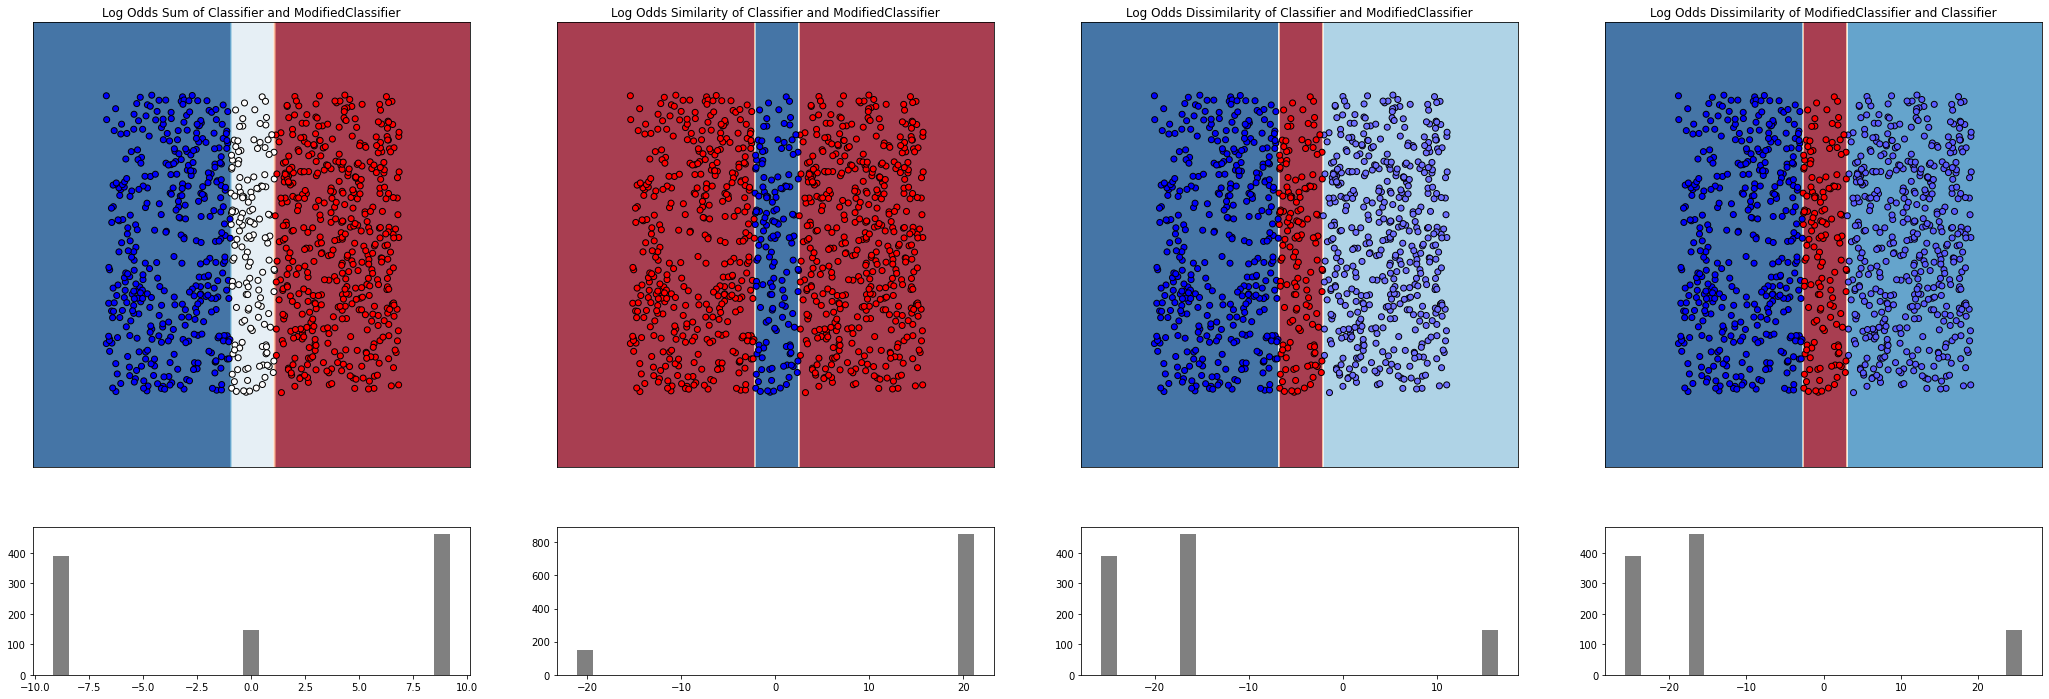

In [6]:
for comparer in comparers:
    plot_decision_boundaries_and_distributions(comparer, X)

## Generate Explanations

In [7]:
SHAPExplainer.group_name = notebook_name

probability_single_model_explainers = [
    make_shap_explainer(str(classifier), classifier.predict_proba, X, feature_names=feature_names)
    for classifier in classifiers]
log_odds_single_model_explainers = [
    make_shap_explainer(str(classifier) + ' Log Odds', classifier.predict_log_odds, X, feature_names=feature_names)
    for classifier in classifiers]
single_model_explainers = probability_single_model_explainers + log_odds_single_model_explainers

probability_comparison_explainers = [
    make_shap_explainer(str(comparer), comparer.predict_proba, X, feature_names=feature_names)
    for comparer in comparers]
log_odds_comparison_explainers = [
    make_shap_explainer(str(comparer) + ' Log Odds', comparer.predict_log_odds, X, feature_names=feature_names)
    for comparer in comparers]
comparison_explainers = probability_comparison_explainers + log_odds_comparison_explainers

explainers = single_model_explainers + comparison_explainers

Loaded explanation: explanations/Move Decision Boundary/Classifier.exp
Loaded explanation: explanations/Move Decision Boundary/ModifiedClassifier.exp
Loaded explanation: explanations/Move Decision Boundary/Classifier Log Odds.exp
Loaded explanation: explanations/Move Decision Boundary/ModifiedClassifier Log Odds.exp
Finished generating: explanations/Move Decision Boundary/Difference of Classifier and ModifiedClassifier.exp (0:00:57.869287)
Finished generating: explanations/Move Decision Boundary/Absolute Difference of Classifier and ModifiedClassifier.exp (0:00:32.798351)
Finished generating: explanations/Move Decision Boundary/Zero-Clipped Difference of Classifier and ModifiedClassifier.exp (0:00:30.238745)
Finished generating: explanations/Move Decision Boundary/Zero-Clipped Difference of ModifiedClassifier and Classifier.exp (0:00:30.265667)
Loaded explanation: explanations/Move Decision Boundary/Sum of Classifier and ModifiedClassifier.exp
Loaded explanation: explanations/Move Deci

Exact explainer: 1001it [00:57, 17.36it/s]                         
Exact explainer: 1001it [00:32, 19.89it/s]                         
Exact explainer: 1001it [00:30, 23.05it/s]                         
Exact explainer: 1001it [00:30, 21.13it/s]                          
Exact explainer: 1001it [00:40, 17.63it/s]                         
Exact explainer: 1001it [00:38, 19.86it/s]                         
Exact explainer: 1001it [00:23, 27.78it/s]                         
Exact explainer: 1001it [00:24, 21.70it/s]                         


## Analyze

### SHAP Value Distribution

#### Classifier

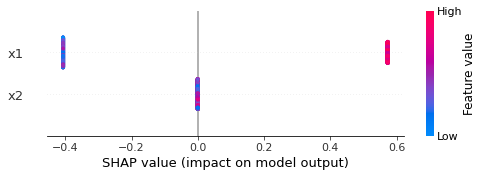

#### ModifiedClassifier

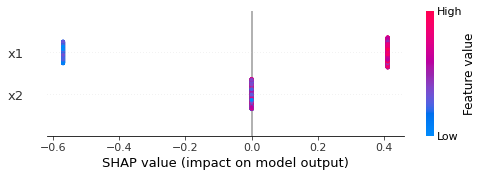

#### Classifier Log Odds

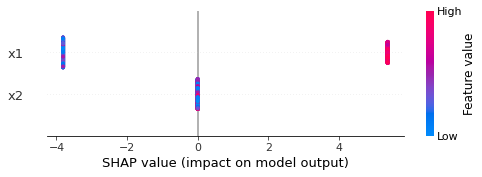

#### ModifiedClassifier Log Odds

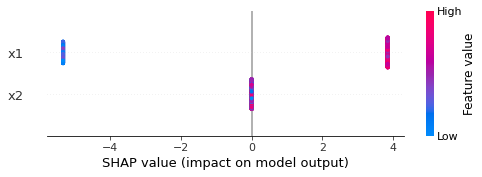

#### Difference of Classifier and ModifiedClassifier

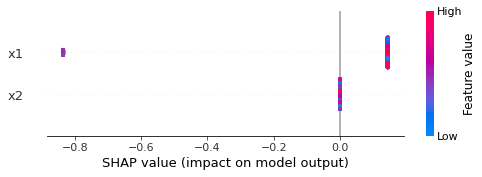

#### Absolute Difference of Classifier and ModifiedClassifier

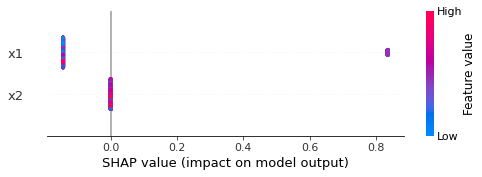

#### Zero-Clipped Difference of Classifier and ModifiedClassifier

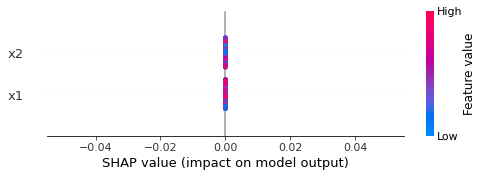

#### Zero-Clipped Difference of ModifiedClassifier and Classifier

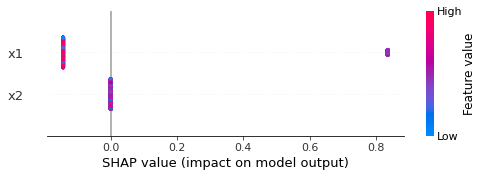

#### Sum of Classifier and ModifiedClassifier

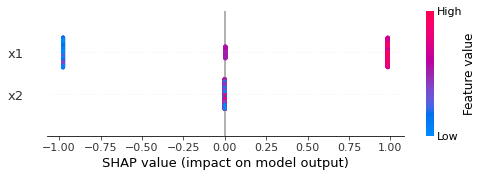

#### Similarity of Classifier and ModifiedClassifier

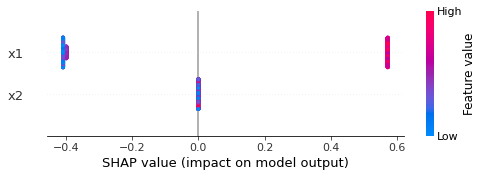

#### Dissimilarity of Classifier and ModifiedClassifier

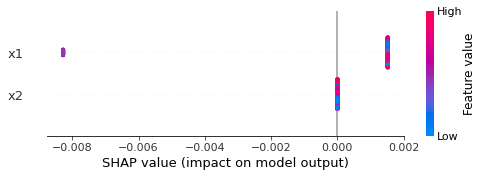

#### Dissimilarity of ModifiedClassifier and Classifier

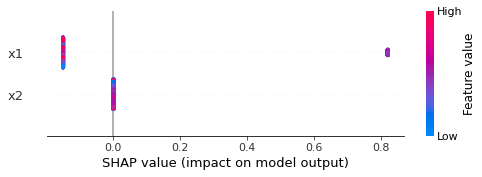

#### Difference of Classifier and ModifiedClassifier Log Odds

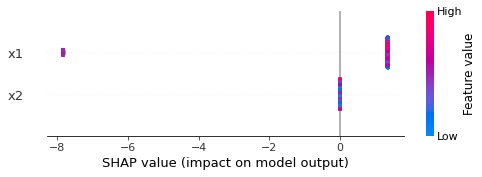

#### Absolute Difference of Classifier and ModifiedClassifier Log Odds

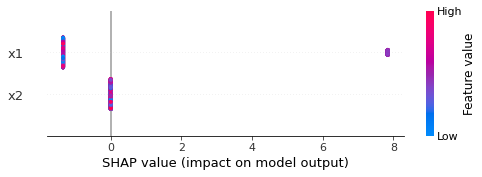

#### Zero-Clipped Difference of Classifier and ModifiedClassifier Log Odds

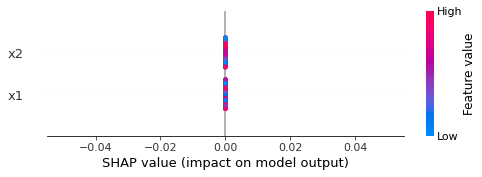

#### Zero-Clipped Difference of ModifiedClassifier and Classifier Log Odds

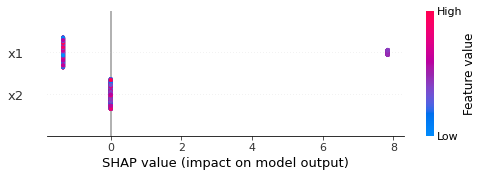

#### Sum of Classifier and ModifiedClassifier Log Odds

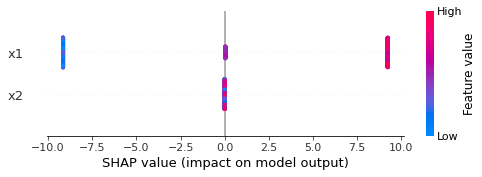

#### Similarity of Classifier and ModifiedClassifier Log Odds

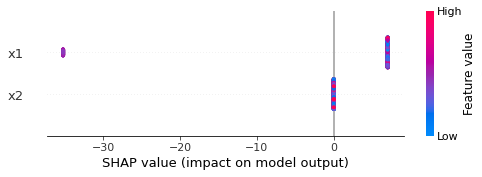

#### Dissimilarity of Classifier and ModifiedClassifier Log Odds

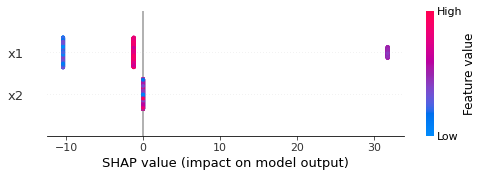

#### Dissimilarity of ModifiedClassifier and Classifier Log Odds

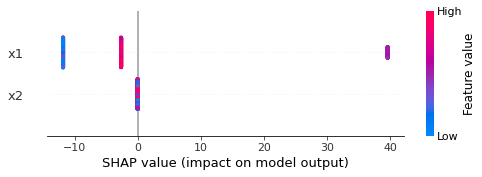

In [8]:
for explainer in explainers:
    plot_shap_value_distribution(explainer)

### Features' Partial Dependence Plots

#### Classifier

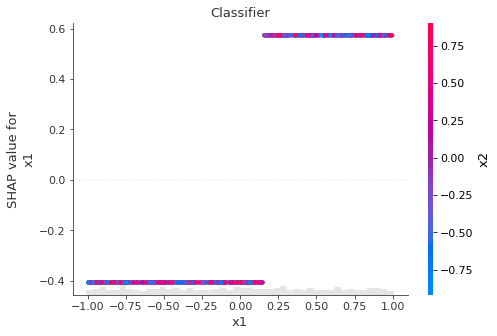

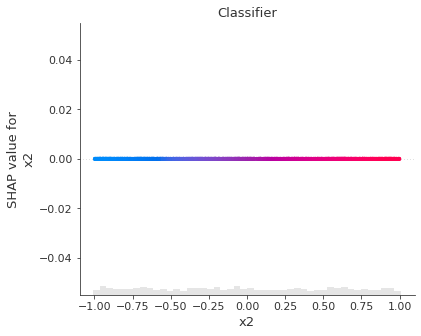

#### ModifiedClassifier

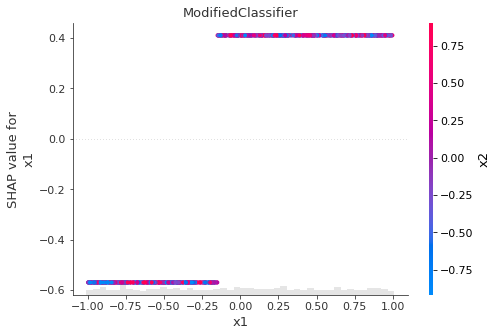

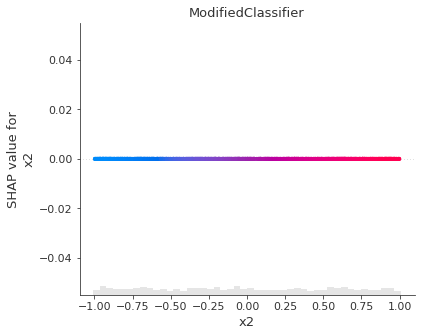

#### Classifier Log Odds

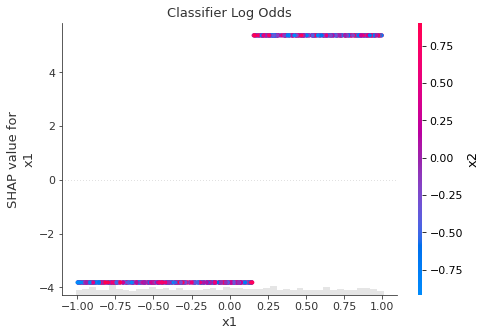

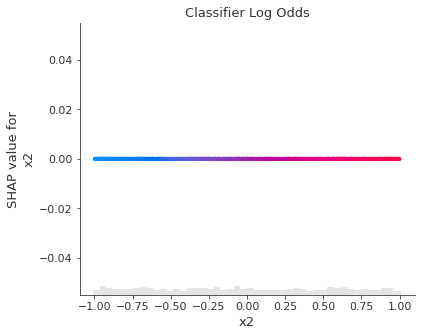

#### ModifiedClassifier Log Odds

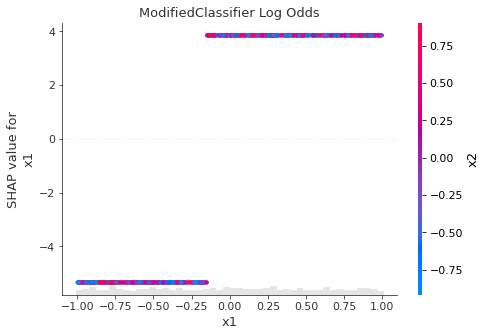

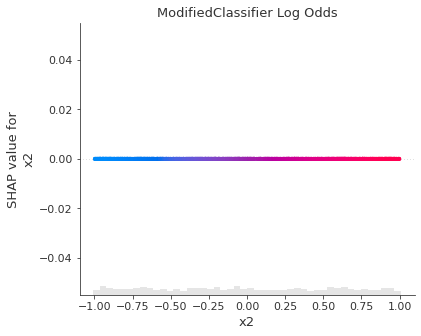

#### Difference of Classifier and ModifiedClassifier

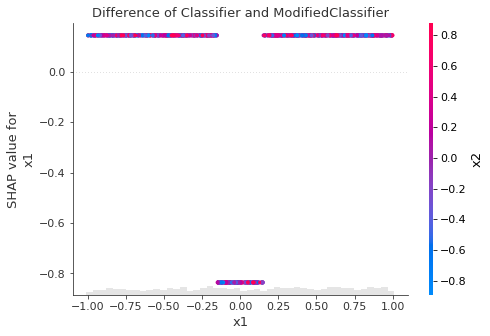

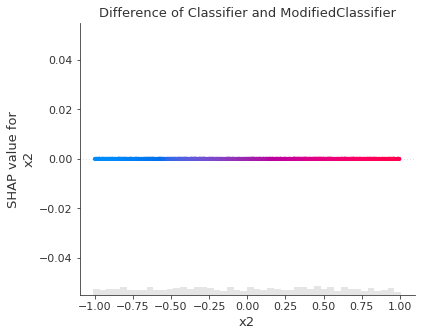

#### Absolute Difference of Classifier and ModifiedClassifier

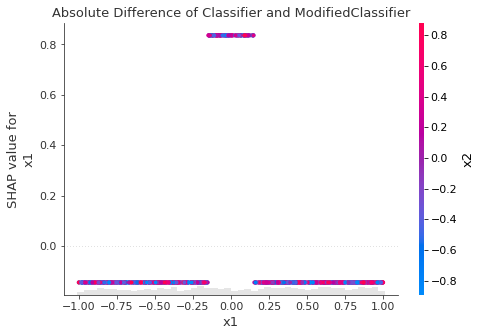

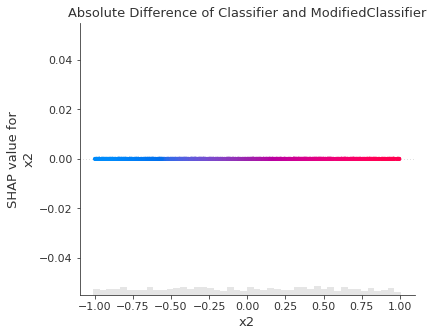

#### Zero-Clipped Difference of Classifier and ModifiedClassifier

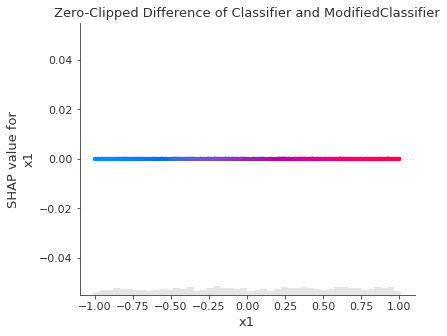

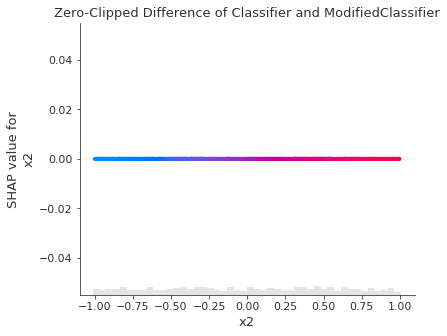

#### Zero-Clipped Difference of ModifiedClassifier and Classifier

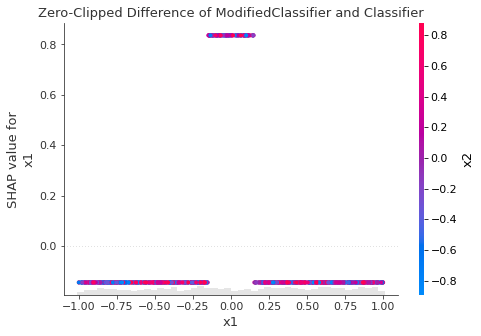

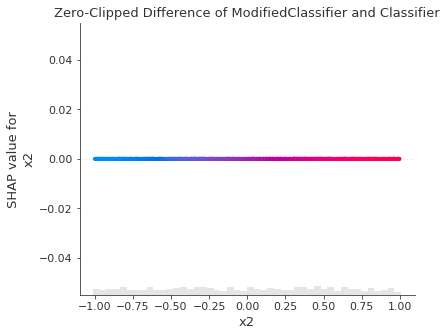

#### Sum of Classifier and ModifiedClassifier

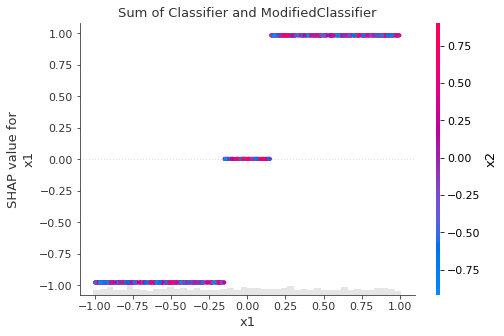

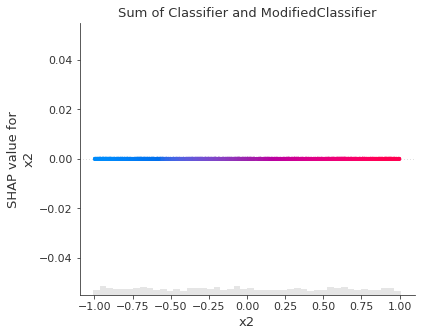

#### Similarity of Classifier and ModifiedClassifier

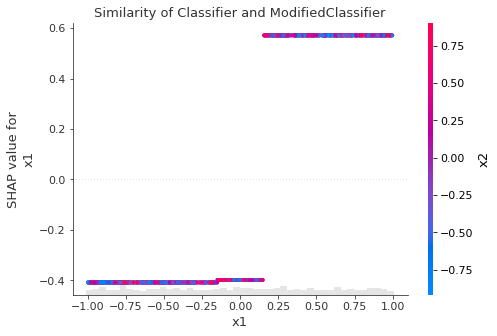

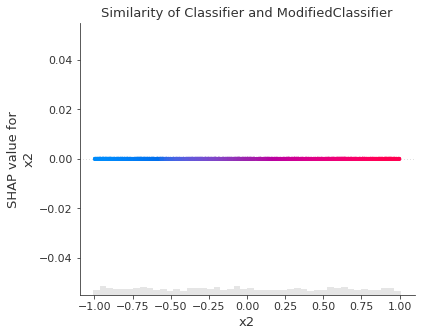

#### Dissimilarity of Classifier and ModifiedClassifier

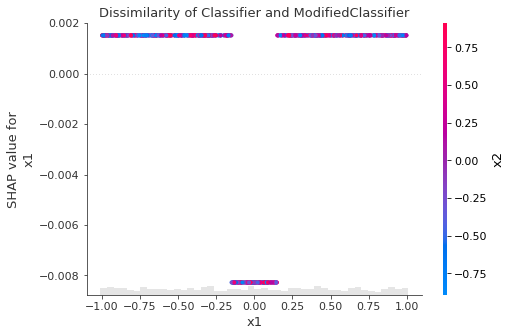

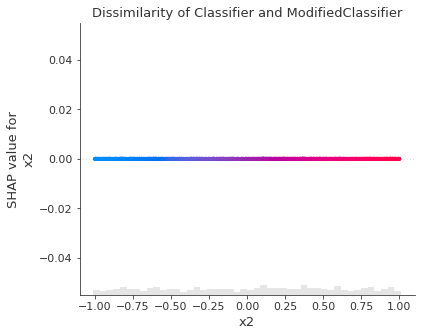

#### Dissimilarity of ModifiedClassifier and Classifier

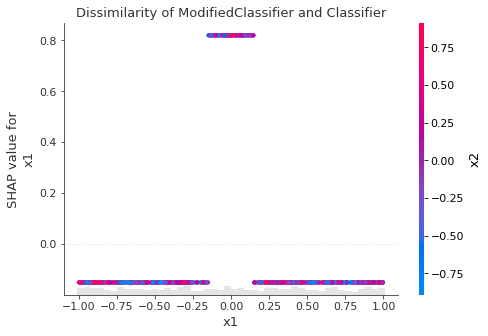

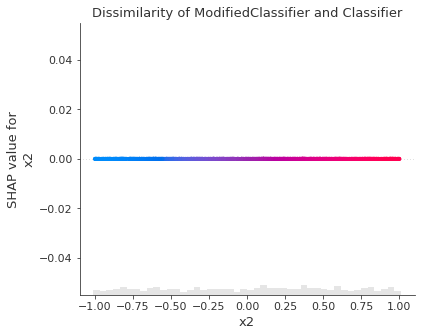

#### Difference of Classifier and ModifiedClassifier Log Odds

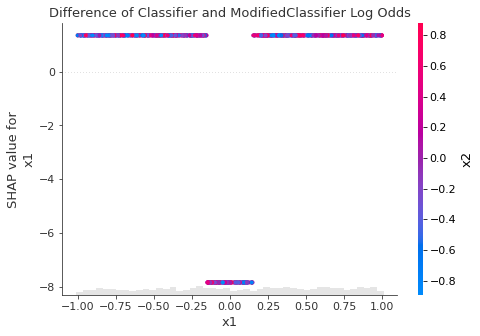

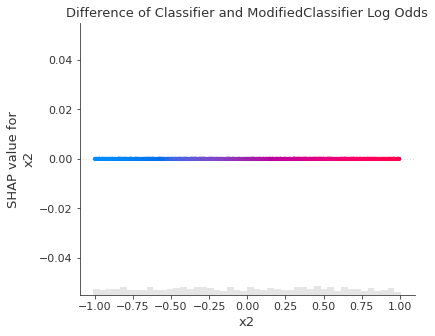

#### Absolute Difference of Classifier and ModifiedClassifier Log Odds

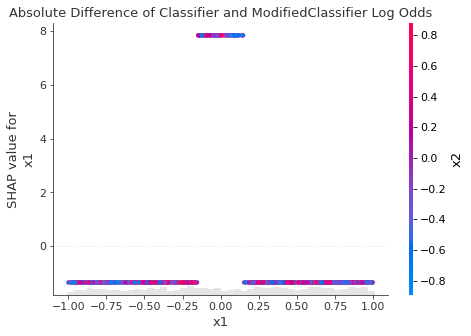

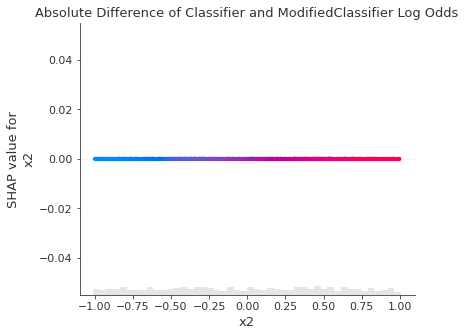

#### Zero-Clipped Difference of Classifier and ModifiedClassifier Log Odds

KeyboardInterrupt: 

<Figure size 432x360 with 0 Axes>

In [9]:
for explainer in explainers:
    plot_shap_partial_dependence(explainer)

### Stacked SHAP Explanations, Clustered by Similarity

In [ ]:
plot_shap_values_stacked(*probability_single_model_explainers)
plot_shap_values_stacked(*log_odds_single_model_explainers)

for explainer in comparison_explainers:
    plot_shap_values_stacked(explainer)

### Hierarchically Clustered SHAP Values

In [ ]:
for explainer in explainers:
    plot_shap_values_hierarchically_clustered(explainer)
